# Project on Housing Sales in King County,Washington,USA 

#### Shuvam Anupam

#### 18-02-2024

#### Guided by--Dr.Joeseph Santarcangelo,IBM

### Project Scenario
 Working on a Real Estate Investment Trust project. The Trust would like to start investing in Residential real estate.
 The dataset contains house sale prices for King County, which includes City Seattle. It includes homes sold between May 2014 and May   2015. It was taken from kaggle.com
#### Analysis to be done on the dataset
 Determing the market price of a house given a set of features.  
 To analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of  floors.
Completing the ten questions which were asked by the investors of the Trust

#### Importing Libraries to be used in the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Importing CSV File

In [2]:
df=pd.read_csv('D:\housing.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling

#### Dropping the columns "id" from axis 1 using the method drop(), then used the method describe() to obtain a statistical summary of the data.Inplace parameter is set to True

In [6]:
df.drop(["id"],axis=1,inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns  bedrooms and  bathrooms 

In [8]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


#### Replacing the missing values of the column 'bedrooms' and 'bathrooms'  with the mean of the column 'bedrooms','bathrooms'     using the method replace(). inplaced parameter to True.Print the null values

In [9]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [10]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis

In [11]:
df['floors'].value_counts()
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#### Used the method value_counts to count the number of houses with unique   floor values,then using the method .to_frame() to convert it to a data frame.

<Axes: xlabel='waterfront', ylabel='price'>

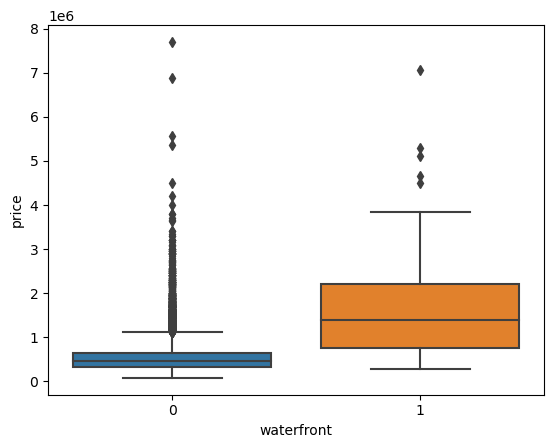

In [12]:
sns.boxplot(x="waterfront",y="price",data=df)


#### Used the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='sqft_above', ylabel='price'>

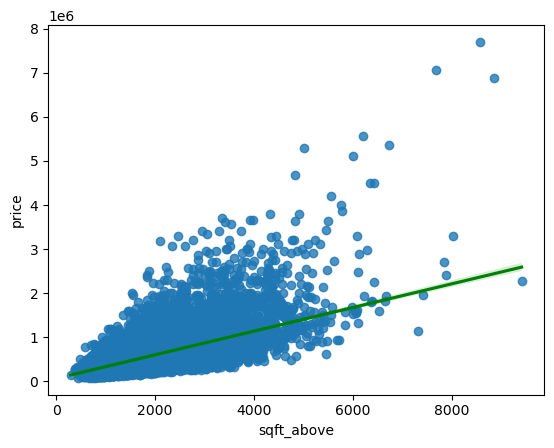

In [13]:
sns.regplot(x="sqft_above",y="price",data=df,line_kws={'color':'green'})

#### Used the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price

In [14]:
try:
    df.corr()['price'].sort_values()
except ValueError:
   '20141013T000000'


#### Used the Pandas method corr() to find the feature other than price that is most correlated with price

# Model development

#### Fitting a linear regression model using the longitude feature 'long' and caculated the R^2.

In [15]:
X = df[['long']]
Y = df['price']
lr = LinearRegression()
lr.fit(X,Y)
lr.score(X, Y)

0.00046769430149029567

#### Fitting a linear regression model to predict the 'price' using the feature 'sqft_living' then calculated the R^2

In [16]:
lr=LinearRegression()
X=df[["sqft_living"]]
Y=df[["price"]]
lr.fit(X,Y)
lr.score(X,Y)

0.4928532179037931

#### Fitting a linear regression model to predict the 'price' using the list of features then calculated the r^2

In [17]:
lr=LinearRegression()
X=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y=df[['price']]
lr.fit(X,Y)
lr.score(X,Y)

0.6576856655884729

### Next step
Created a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

#### Used the list shown below in input to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
X=X.astype(float)
pipe.fit(X,Y)
ypipe=pipe.predict(X)
print(r2_score(Y,ypipe))

0.7503819326320279


# Model Evaluation and Refinement

#### Importing necessary library:

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#### Splitting Data into train and test sets:

In [20]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


#### Creating and fitting a Ridge regression object using the training data, setting the regularization parameter to 0.1. calculating the R^2 using the test data.
Importing Ridge from sklearn.linear_model

In [21]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat=RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6478759163939101


#### Performing a second order polynomial transform on both the training data and testing data.Creating and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1, and calculated the R^2 utilising the test data provided.

In [23]:
polynomial_features=PolynomialFeatures(degree=2)
x_poly=polynomial_features.fit_transform(X)
lr=LinearRegression()
lr.fit(x_poly,Y)
y_poly=lr.predict(x_poly)
r2=r2_score(Y,y_poly)
print(r2)

0.7511333905017407


# Conclusion
In the analysis done above it is clearly shown on the plot (boxplot,regplot) outlines the price relations on the following housingfeatures satisfies for a perfect correlation with price
and the linear regression parameters is between 0.5 to 1 shows a perfect fit for the model used to train and test the data by Ridge regression to see the multicolinearity on unseen data and lastly second order polynomial tranform preformed on the data to fit a complexity of the data 

           *****End of the Report*****